## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statistics 
import random
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss, classification_report
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from sklearn import metrics

### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
anuran_dataset = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
display(anuran_dataset)
display(anuran_dataset.shape)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


(7195, 26)

In [3]:
anuran_dataset.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


In [4]:
X = anuran_dataset.drop(columns=['Family', 'Genus', 'Species', 'RecordID'])
y = anuran_dataset[['Family', 'Genus', 'Species']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    random_state=42,
    stratify=y
)

### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

The Exact Match Ratio is the strictest metric for multi-label classification. It only considers a prediction correct if the entire set of predicted labels exactly matches the entire set of ground truth labels for an instance.

The Hamming Loss quantifies the fraction of the wrong labels to the total number of labels. It computes the average number of label errors per instance on a per-label basis.

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [5]:
labels = ['Family', 'Genus', 'Species']

average_gaussian_hamming_score = []

for label in labels:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y[label],
        test_size=0.3,
        random_state=45
    )
    
    parameters = [{
        'kernel': ['rbf'],
        'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
        'C': [1, 10, 100, 1000]
    }]
    
    clf = GridSearchCV(
        SVC(decision_function_shape='ovr'),
        parameters,
        cv=10,
        n_jobs=-1
    )
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    loss = hamming_loss(y_test, y_pred)
    
    print(f"\n=== {label} ===")
    print(f"Best params: {clf.best_params_}")
    print(classification_report(y_test, y_pred))
    print(f"Hamming Loss: {loss}")
    average_gaussian_hamming_score.append(1 - loss)


=== Family ===
Best params: {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
                 precision    recall  f1-score   support

      Bufonidae       0.96      0.81      0.88        27
  Dendrobatidae       0.99      1.00      0.99       182
        Hylidae       0.99      0.97      0.98       638
Leptodactylidae       0.99      1.00      0.99      1312

       accuracy                           0.99      2159
      macro avg       0.98      0.95      0.96      2159
   weighted avg       0.99      0.99      0.99      2159

Hamming Loss: 0.012968967114404817

=== Genus ===
Best params: {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
               precision    recall  f1-score   support

    Adenomera       0.99      1.00      0.99      1239
     Ameerega       0.98      0.99      0.99       182
Dendropsophus       1.00      0.86      0.93        88
    Hypsiboas       0.99      0.99      0.99       464
Leptodactylus       0.95      0.99      0.97        73
Osteocephalus       0.97      0.9

In [6]:
total = 0
for score in average_gaussian_hamming_score:
    total += score  
average = total / len(average_gaussian_hamming_score)

print("Average Hamming Score is:")
print(average)

Average Hamming Score is:
0.9861046780917091


### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize4 the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [7]:
average_L1_HammScore = []
for label in labels:
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y[label],
        test_size=0.3,
        random_state=45
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'max_iter': [100000],
    'tol': [1e-4, 1e-3, 1e-2]  
    }

    clf = GridSearchCV(
        LinearSVC(penalty='l1', dual=False, loss='squared_hinge'),
        parameters,
        cv=10,
        n_jobs=-1
    )
    clf.fit(X_train_scaled, y_train.values.ravel())
    
    y_pred = clf.predict(X_test_scaled)
    loss = hamming_loss(y_test, y_pred)
    
    print(f"\n=== {label} ===")
    print(f"Best C: {clf.best_params_['C']}")
    print(classification_report(y_test, y_pred))
    print(f"Hamming Loss: {loss}")
    average_L1_HammScore.append(1 - loss)

avg_score = sum(average_L1_HammScore)/len(average_L1_HammScore)
print("\nAverage Hamming Score:", f"{avg_score}")


=== Family ===
Best C: 1
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        27
  Dendrobatidae       0.90      0.85      0.87       182
        Hylidae       0.88      0.90      0.89       638
Leptodactylidae       0.95      0.97      0.96      1312

       accuracy                           0.93      2159
      macro avg       0.68      0.68      0.68      2159
   weighted avg       0.92      0.93      0.92      2159

Hamming Loss: 0.07318202871699861

=== Genus ===
Best C: 100
               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1239
     Ameerega       0.92      0.95      0.93       182
Dendropsophus       0.93      0.60      0.73        88
    Hypsiboas       0.93      0.96      0.94       464
Leptodactylus       0.97      0.96      0.97        73
Osteocephalus       0.95      0.57      0.71        35
     Rhinella       1.00      0.56      0.71        27
       Scinax

### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [8]:
features = anuran_dataset.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
labels = anuran_dataset[['Family', 'Genus', 'Species']]

def train_with_smote(features, target_label):
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        target_label,
        test_size=0.3,
        random_state=44
    )
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('smote', SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=5)),
        ('clf', LinearSVC(
            multi_class='ovr',
            penalty='l1',
            loss='squared_hinge',
            dual=False,
            class_weight='balanced',
            max_iter=100000,
            tol=1e-3
        ))
    ])

    param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__tol': [1e-4, 1e-3, 1e-2]
    }

    
    grid = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
    grid.fit(X_train, y_train.values.ravel())
    
    y_pred = grid.predict(X_test)
    
    print(f"\n=== {target_label.name} ===")
    print(f"Best C: {grid.best_params_['clf__C']}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"Hamming Loss: {hamming_loss(y_test, y_pred)}")
    
    return 1 - hamming_loss(y_test, y_pred)

hamming_scores = []
for label in labels.columns:
    score = train_with_smote(features, labels[label])
    hamming_scores.append(score)

print(f"\nAverage Hamming Score: {sum(hamming_scores)/3}")


=== Family ===
Best C: 10
                 precision    recall  f1-score   support

      Bufonidae       0.24      0.79      0.37        14
  Dendrobatidae       0.81      0.95      0.87       156
        Hylidae       0.93      0.88      0.90       650
Leptodactylidae       0.97      0.96      0.96      1339

       accuracy                           0.93      2159
      macro avg       0.74      0.89      0.78      2159
   weighted avg       0.94      0.93      0.93      2159

Hamming Loss: 0.0699397869383974


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



=== Genus ===
Best C: 10
               precision    recall  f1-score   support

    Adenomera       0.98      0.97      0.98      1259
     Ameerega       0.94      0.95      0.94       156
Dendropsophus       0.82      0.74      0.78        97
    Hypsiboas       0.96      0.96      0.96       470
Leptodactylus       0.94      0.96      0.95        80
Osteocephalus       0.76      0.76      0.76        42
     Rhinella       0.39      0.79      0.52        14
       Scinax       0.95      0.98      0.96        41

     accuracy                           0.95      2159
    macro avg       0.84      0.89      0.86      2159
 weighted avg       0.96      0.95      0.95      2159

Hamming Loss: 0.047707271885132005


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



=== Species ===
Best C: 1
                        precision    recall  f1-score   support

        AdenomeraAndre       0.93      0.93      0.93       192
AdenomeraHylaedactylus       1.00      1.00      1.00      1067
    Ameeregatrivittata       0.95      0.96      0.96       156
            HylaMinuta       0.91      0.76      0.83        97
  HypsiboasCinerascens       0.92      0.94      0.93       141
     HypsiboasCordobae       0.96      0.95      0.95       329
   LeptodactylusFuscus       0.95      0.97      0.96        80
 OsteocephalusOophagus       0.87      0.79      0.82        42
     Rhinellagranulosa       0.42      0.79      0.55        14
           ScinaxRuber       0.89      1.00      0.94        41

              accuracy                           0.96      2159
             macro avg       0.88      0.91      0.89      2159
          weighted avg       0.96      0.96      0.96      2159

Hamming Loss: 0.03983325613710051

Average Hamming Score: 0.94750656167979

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [9]:
hamming_losses = []
hamming_scores = []

family_majority = {cls: [] for cls in range(1, 51)}
genus_majority = {cls: [] for cls in range(1, 51)}
species_majority = {cls: [] for cls in range(1, 51)}

silhouette_average = {}
    
for k in range(2, 50):
    random_state = random.randint(0, 900)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=random_state).fit(X)
    cluster_labels = kmeans.labels_
    silhouette_average[k] = metrics.silhouette_score(X, cluster_labels)

optimal_k = max(silhouette_average, key=silhouette_average.get)
print("Optimal K:", optimal_k)
 
for cluster in range(1, 51):
    
    random_state = random.randint(0, 900)

    kmeans_final = KMeans(n_clusters=4, random_state=random_state).fit(X)
    final_labels = kmeans_final.labels_

    clusters = pd.concat([X, y, pd.DataFrame({'labels': final_labels.tolist()})], axis=1)
    clusters['labels'].value_counts()

    
    majority_triplets = {k: [] for k in range(4)}
    for k in range(4):
        cluster_data = clusters[clusters['labels'] == k]
        majority_triplets[k].extend([
            cluster_data['Family'].value_counts().idxmax(),
            cluster_data['Genus'].value_counts().idxmax(),
            cluster_data['Species'].value_counts().idxmax()
        ])
        family_majority[cluster].append(cluster_data['Family'].value_counts().idxmax())
        genus_majority[cluster].append(cluster_data['Genus'].value_counts().idxmax())
        species_majority[cluster].append(cluster_data['Species'].value_counts().idxmax())
   
    clusters['family_pred'] = 'none'
    clusters['genus_pred'] = 'none'
    clusters['species_pred'] = 'none'

    for k in range(4):
        clusters['family_pred'] = np.where(clusters['labels'] == k, majority_triplets[k][0], clusters['family_pred'])
        clusters['genus_pred'] = np.where(clusters['labels'] == k, majority_triplets[k][1], clusters['genus_pred'])
        clusters['species_pred'] = np.where(clusters['labels'] == k, majority_triplets[k][2], clusters['species_pred'])

    
    family_hamming = hamming_loss(clusters['Family'], clusters['family_pred'])
    genus_hamming = hamming_loss(clusters['Genus'], clusters['genus_pred'])
    species_hamming = hamming_loss(clusters['Species'], clusters['species_pred'])
    average_hamming_loss = (family_hamming + genus_hamming + species_hamming) / 3

     
    hamming_losses.append(np.round(average_hamming_loss, 6))
    hamming_scores.append(1 - average_hamming_loss)

print("Standard Deviation for Hamming Scores: {}".format(statistics.stdev(hamming_scores)))
print("Mean for Hamming Scores: {}".format(statistics.mean(hamming_scores)))


Optimal K: 4
Standard Deviation for Hamming Scores: 0.03867402102164208
Mean for Hamming Scores: 0.7591012277044243


### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [10]:
final_triplets = list(zip(
    list(family_majority.values()),
    list(genus_majority.values()),
    list(species_majority.values())
))

major_triplets_dict = {}
for idx in range(50):
    major_triplets_dict[idx] = list(zip(
        final_triplets[idx][0],
        final_triplets[idx][1],
        final_triplets[idx][2]
    ))

print("\nMajority classes in each cluster:")
for cluster_idx in range(1, 51):
    print(f"Cluster {cluster_idx}:")
    print(f"  Majority Family: {family_majority[cluster_idx]}")
    print(f"  Majority Genus: {genus_majority[cluster_idx]}")
    print(f"  Majority Species: {species_majority[cluster_idx]}")


Majority classes in each cluster:
Cluster 1:
  Majority Family: ['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Hylidae']
  Majority Genus: ['Adenomera', 'Ameerega', 'Hypsiboas', 'Hypsiboas']
  Majority Species: ['AdenomeraHylaedactylus', 'Ameeregatrivittata', 'HypsiboasCordobae', 'HypsiboasCinerascens']
Cluster 2:
  Majority Family: ['Leptodactylidae', 'Hylidae', 'Hylidae', 'Leptodactylidae']
  Majority Genus: ['Adenomera', 'Hypsiboas', 'Hypsiboas', 'Adenomera']
  Majority Species: ['AdenomeraHylaedactylus', 'HypsiboasCordobae', 'HypsiboasCordobae', 'AdenomeraHylaedactylus']
Cluster 3:
  Majority Family: ['Hylidae', 'Leptodactylidae', 'Hylidae', 'Dendrobatidae']
  Majority Genus: ['Hypsiboas', 'Adenomera', 'Hypsiboas', 'Ameerega']
  Majority Species: ['HypsiboasCordobae', 'AdenomeraHylaedactylus', 'HypsiboasCinerascens', 'Ameeregatrivittata']
Cluster 4:
  Majority Family: ['Hylidae', 'Leptodactylidae', 'Hylidae', 'Leptodactylidae']
  Majority Genus: ['Hypsiboas', 'Adenomera', 'Hypsi

### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [11]:
def summarize(hamming_losses, hamming_distances):
    
    distance_mean = round(np.mean(hamming_distances), 4)
    distance_stdev = round(np.std(hamming_distances), 4)
 
    loss_mean = round(np.mean(hamming_losses), 4)
    loss_stdev = round(np.std(hamming_losses), 4)
 
    score_mean = round(1 - loss_mean, 4)
    score_stdev = loss_stdev   
     
    summary = {
        "Mean Hamming Distance": [distance_mean],
        "Hamming Distance Standard Deviation": [distance_stdev],
        "Mean Hamming Loss": [loss_mean],
        "Hamming Loss Standard Deviation": [loss_stdev],
        "Mean Hamming Score": [score_mean],
        "Hamming Score Standard Deviation": [score_stdev]
    }
     
    summary = pd.DataFrame(data=summary)
    return summary
 
summary = summarize(hamming_losses, hamming_scores)
display(summary)

,Mean Hamming Distance,Hamming Distance Standard Deviation,Mean Hamming Loss,Hamming Loss Standard Deviation,Mean Hamming Score,Hamming Score Standard Deviation
0,0.7591,0.0383,0.2409,0.0383,0.7591,0.0383


### 3. ISLR 12.6.2

Suppose that we have four observations, for which we compute adissimilarity matrix, given by
   
0.3 0.4 0.7
0.3 0.5 0.8
0.4 0.5 0.45
0.7 0.8 0.45
   .
For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

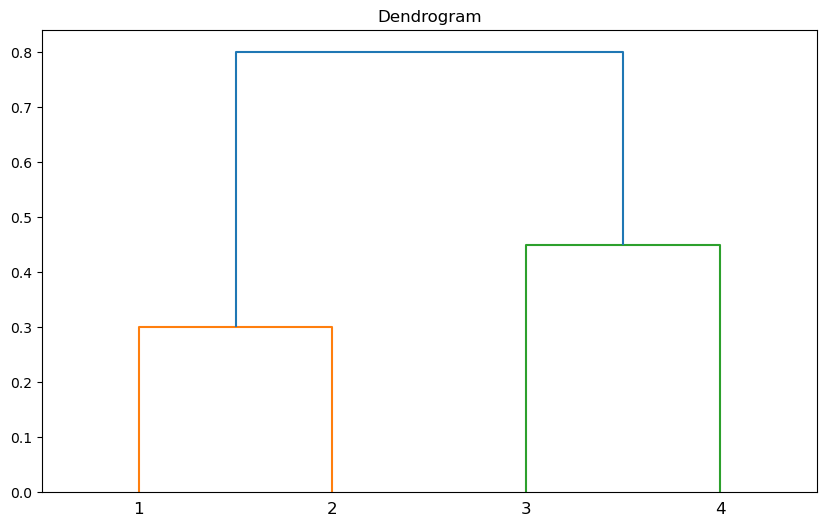

In [12]:
dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dists = squareform(dis_mat)
linkage_matrix = linkage(dists, "complete")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

(b) Repeat (a), this time using single linkage clustering.

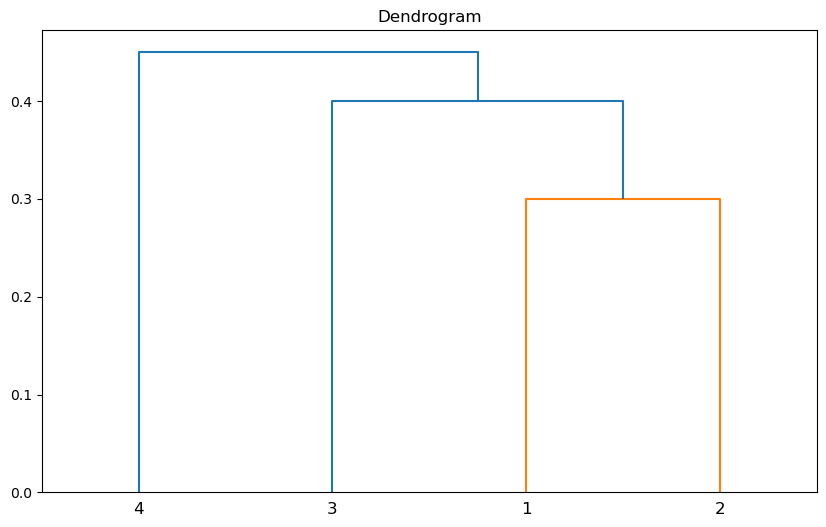

In [13]:
linkage_matrix = linkage(dists, "single")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

(c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

Answer: Observations 1 and 2 are in cluster A and 3 and 4 in cluster B.

(d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

Answer: Observations 1, 2 and 3 are in cluster A and 4 in cluster B.

(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

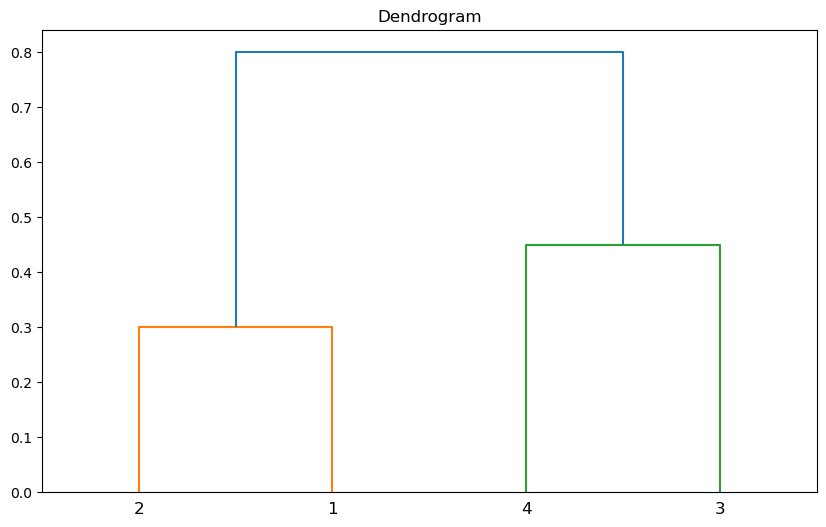

In [14]:
dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
dists = squareform(dis_mat)
linkage_matrix = linkage(dists, "complete")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dendrogram(linkage_matrix, labels=["2", "1", "4", "3"])
plt.title("Dendrogram")
plt.show()